<a href="https://colab.research.google.com/github/xian-cong/Final-Year-Project-Nottingham/blob/main/ECG_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Recognition Classification
Using 16-bit ECG pre-processed data, TensorFlow RNN is used to make predictions.
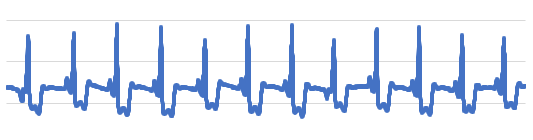

Prediction classes:
- 1 - baseline
- 2 - stress
- 3 - amusement
- 4 - meditation

In [ ]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output.csv')]

In [ ]:
dfs

[        data1    data2    data3    data4    data5    data6    data7    data8  \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
         data9   data10  .

In [ ]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [ ]:
dfs

[         0        1        2        3        4        5        6        7     \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
          8        9     .

Row 0 - 6999 are data while Row 7000 is label

In [ ]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({7000: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31091.0,31103.0,31104.0,31132.0,31180.0,31194.0,31173.0,31151.0,31130.0,31171.0,...,30861.0,30807.0,30807.0,30820.0,30765.0,30793.0,30788.0,30787.0,30865.0,1.0
1,32692.0,32733.0,32901.0,33053.0,33079.0,33091.0,33135.0,33137.0,33112.0,33071.0,...,32839.0,32867.0,32979.0,33090.0,33092.0,33157.0,33233.0,33189.0,33247.0,3.0
2,35431.0,34977.0,34721.0,34495.0,34699.0,35300.0,35713.0,35839.0,35933.0,35943.0,...,34378.0,34287.0,34215.0,34195.0,34229.0,34271.0,34301.0,34364.0,34407.0,1.0
3,32661.0,32710.0,32667.0,32589.0,32589.0,32606.0,32467.0,32161.0,31919.0,31891.0,...,32500.0,32493.0,32499.0,32511.0,32541.0,32529.0,32463.0,32437.0,32433.0,1.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,30844.0,30831.0,30631.0,30325.0,30088.0,29922.0,29847.0,29782.0,29617.0,29297.0,...,31254.0,31425.0,31507.0,31441.0,31423.0,31367.0,31309.0,31335.0,31407.0,3.0
4142,32287.0,32253.0,32225.0,32211.0,32157.0,32183.0,32259.0,32359.0,32415.0,32451.0,...,31784.0,31752.0,31723.0,31684.0,31684.0,31741.0,31811.0,31831.0,31825.0,1.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0,1.0
4144,34434.0,34545.0,34721.0,34969.0,35188.0,35141.0,35051.0,35063.0,35117.0,35132.0,...,29727.0,29739.0,29754.0,29781.0,29911.0,29959.0,29954.0,29760.0,29620.0,2.0


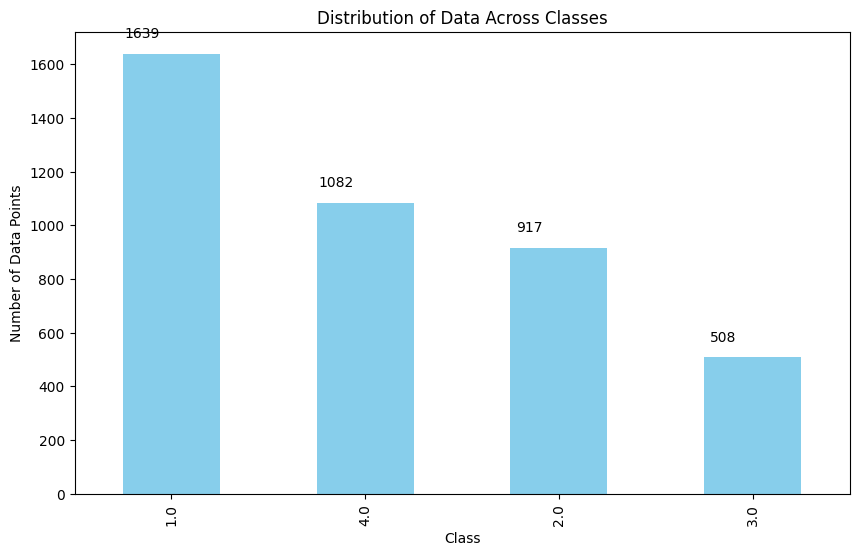

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


## Preprocessing

Can perform data scaling here.

In [ ]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

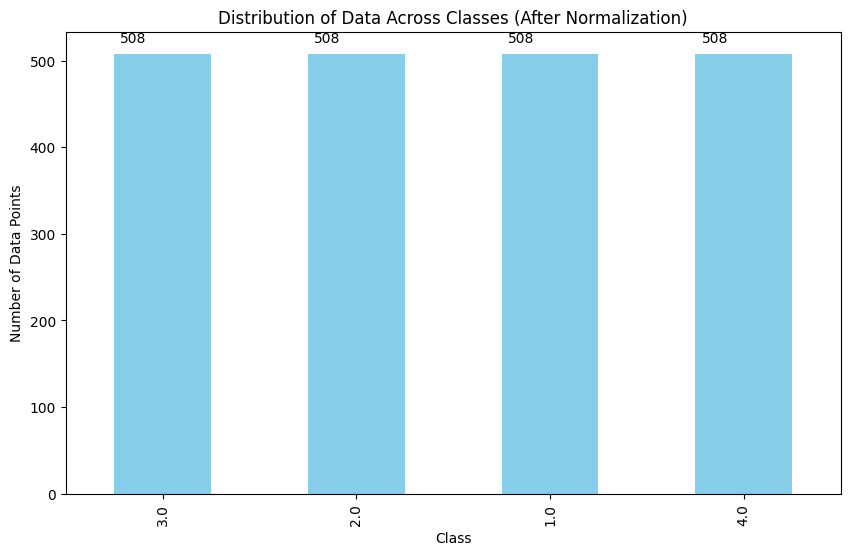

In [ ]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# if want use normalised data for training, use this

y = normalized_data['Label'].copy()
X = normalized_data.drop('Label', axis = 1).copy()

In [ ]:
# if want use original data for training, use this

# y = data['Label'].copy()
# X = data.drop('Label', axis = 1).copy()

In [ ]:
# label column
y

1981    3.0
262     3.0
3792    3.0
3206    3.0
1476    2.0
       ... 
344     4.0
74      4.0
3879    3.0
3664    4.0
3317    4.0
Name: Label, Length: 2032, dtype: float64

In [ ]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
1981,31077.0,31053.0,31092.0,31204.0,31257.0,31239.0,31241.0,31149.0,31076.0,31076.0,...,31653.0,31673.0,31767.0,31722.0,31714.0,31768.0,31783.0,31755.0,31731.0,31752.0
262,31505.0,31446.0,31386.0,31387.0,31407.0,31389.0,31361.0,31343.0,31308.0,31325.0,...,34582.0,34572.0,34565.0,34588.0,34623.0,34636.0,34687.0,34734.0,34795.0,34943.0
3792,33039.0,33199.0,33321.0,33404.0,33420.0,33427.0,33431.0,33461.0,33429.0,33340.0,...,30604.0,30595.0,30631.0,30639.0,30621.0,30615.0,30609.0,30625.0,30666.0,30705.0
3206,29818.0,29948.0,30109.0,30212.0,30227.0,30189.0,30168.0,30149.0,30148.0,30154.0,...,33836.0,33780.0,33761.0,33673.0,33573.0,33489.0,33375.0,33290.0,33205.0,33105.0
1476,32197.0,32169.0,32289.0,32324.0,32319.0,32373.0,32480.0,32587.0,32593.0,32529.0,...,31332.0,31245.0,31172.0,31093.0,31060.0,30757.0,30281.0,29945.0,30103.0,30673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,32753.0,32837.0,32701.0,32671.0,32731.0,32798.0,32855.0,32865.0,32911.0,32978.0,...,30958.0,30957.0,30945.0,30935.0,30935.0,30939.0,30939.0,30953.0,30973.0,31004.0
74,31455.0,31449.0,31433.0,31423.0,31482.0,31509.0,31487.0,31406.0,31351.0,31367.0,...,32640.0,32610.0,32637.0,32629.0,32549.0,32485.0,32477.0,32459.0,32439.0,32413.0
3879,34107.0,34211.0,34317.0,34417.0,34516.0,34556.0,34567.0,34604.0,34597.0,34615.0,...,39065.0,35081.0,31065.0,27249.0,23733.0,20374.0,17459.0,15456.0,14311.0,13833.0
3664,31661.0,31691.0,31729.0,31757.0,31799.0,31875.0,31950.0,31971.0,31981.0,32009.0,...,35095.0,34785.0,34519.0,34299.0,34046.0,33708.0,33439.0,33142.0,32885.0,32631.0


### Split into train and test sets

In [ ]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
741,27812.0,27904.0,27945.0,27965.0,27997.0,28087.0,28255.0,28439.0,28527.0,28551.0,...,30595.0,30597.0,30631.0,30607.0,30405.0,30011.0,29519.0,29043.0,28596.0,28208.0
2213,28892.0,28774.0,28618.0,28503.0,28401.0,28305.0,28231.0,28157.0,28114.0,28105.0,...,31907.0,31908.0,31892.0,31911.0,31905.0,31913.0,31921.0,31963.0,31980.0,31983.0
1037,31199.0,31284.0,31399.0,31509.0,31583.0,31679.0,31772.0,31878.0,31993.0,32113.0,...,31369.0,31492.0,31615.0,31730.0,31837.0,31953.0,32063.0,32186.0,32319.0,32449.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29082.0,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0
2814,33220.0,33244.0,33229.0,33213.0,33210.0,33197.0,33212.0,33245.0,33258.0,33273.0,...,33465.0,33496.0,33517.0,33517.0,33516.0,33489.0,33475.0,33444.0,33430.0,33395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,32298.0,32242.0,32133.0,32058.0,31965.0,31846.0,31701.0,31612.0,31626.0,31677.0,...,35111.0,35233.0,35340.0,35423.0,35396.0,35348.0,35279.0,35180.0,35081.0,35105.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35412.0,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0
3721,29937.0,29893.0,29889.0,30023.0,29899.0,29861.0,29879.0,29781.0,29783.0,29908.0,...,32898.0,32933.0,33037.0,33197.0,33340.0,33411.0,33183.0,33309.0,33509.0,33523.0
1965,29727.0,29613.0,29621.0,29697.0,29770.0,29808.0,29895.0,29948.0,29911.0,29919.0,...,30245.0,30269.0,30310.0,30303.0,30268.0,30249.0,30223.0,30249.0,30292.0,30316.0


In [ ]:
# 70% of labels
y_train

741     4.0
2213    1.0
1037    3.0
4       3.0
2814    1.0
       ... 
2921    4.0
4143    1.0
3721    2.0
1965    1.0
3984    4.0
Name: Label, Length: 1422, dtype: float64

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

model = Sequential()

y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# Input layer
model.add(Dense(128, input_shape=(X_train.shape[1],)))

# # FC Layer - 128 nodes
# model.add(Dense(256))

# # Batch Normalisation - 128 nodes
# model.add(BatchNormalization())

# # Dropout 0.5 - 128 nodes
# model.add(Dropout(0.5))

# # Leaky RELU 0.2 - 128 nodes
# model.add(LeakyReLU(0.2))

# # FC Layer - 128 nodes
# model.add(Dense(128))

# # Batch Normalisation - 128 nodes
# model.add(BatchNormalization())

# # Dropout 0.5 - 128 nodes
# model.add(Dropout(0.5))

# # Leaky RELU 0.2 - 128 nodes
# model.add(LeakyReLU(0.2))

# # model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(64))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(32))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(16))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(4, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               896128    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

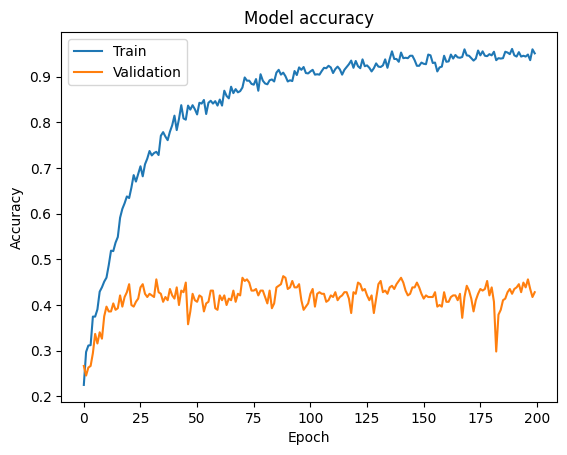

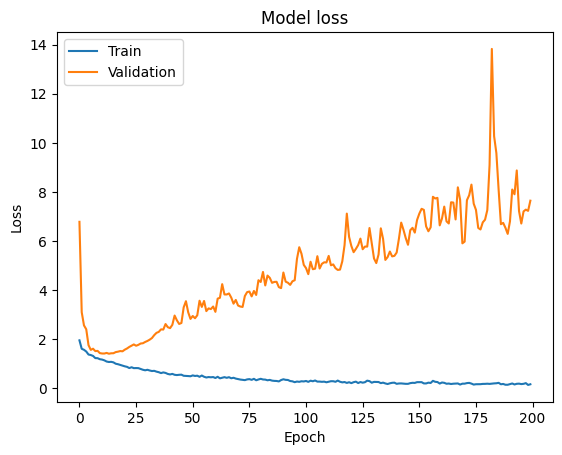

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

results = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1]*100))

Test Accuracy: 28.03%


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

# # Assuming y_train contains class labels starting from 1
# # Subtract 1 to bring them into the range [0, num_classes-1]
# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model = Sequential()

# # Input layer
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# # Hidden layers
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# # Output layer with 4 classes and softmax activation for multi-class classification
# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Train the model
# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 454436 (1.73 MB)
Trainable params: 454436 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
73/73 [==============================] - 2s 15ms/step - loss: 35071.6875 - accuracy: 0.2779 - val_loss: 2562.0054 - val_accuracy: 0.3580
Epo

## RNN Training

In [ ]:
# # for GRU in RNN
# tf.expand_dims(X_train, axis=2).shape

TensorShape([2902, 7000, 1])

In [ ]:
# ## RNN (evaluate as a time series)
# # inputs = tf.keras.Input(shape=(X_train.shape[1],))

# # expand = tf.expand_dims(inputs, axis=2)
# # gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
# # flatten = tf.keras.layers.Flatten()(gru)

# # outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

# # model = tf.keras.Model(inputs=inputs, outputs=outputs)

# # print(model.summary())

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, GRU, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU

# inputs = Input(shape=(X_train.shape[1],))

# # Expand dimensions for GRU input
# expand = tf.expand_dims(inputs, axis=2)

# # GRU layers
# gru1 = GRU(256, return_sequences=True)(expand)
# gru2 = GRU(128, return_sequences=True)(gru1)

# # Flatten the output
# flatten = Flatten()(gru2)

# # Dense layers
# dense1 = Dense(128)(flatten)
# batch_norm1 = BatchNormalization()(dense1)
# dropout1 = Dropout(0.5)(batch_norm1)
# leaky_relu1 = LeakyReLU(0.2)(dropout1)

# dense2 = Dense(64)(leaky_relu1)
# batch_norm2 = BatchNormalization()(dense2)
# dropout2 = Dropout(0.5)(batch_norm2)
# leaky_relu2 = LeakyReLU(0.2)(dropout2)

# dense3 = Dense(16)(leaky_relu2)
# batch_norm3 = BatchNormalization()(dense3)
# dropout3 = Dropout(0.5)(batch_norm3)
# leaky_relu3 = LeakyReLU(0.2)(dropout3)

# # Output layer with softmax activation
# outputs = Dense(4, activation='softmax')(leaky_relu3)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs)

# # Print the model summary
# model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7000)]            0         
                                                                 
 tf.expand_dims_2 (TFOpLamb  (None, 7000, 1)           0         
 da)                                                             
                                                                 
 gru_2 (GRU)                 (None, 7000, 256)         198912    
                                                                 
 gru_3 (GRU)                 (None, 7000, 128)         148224    
                                                                 
 flatten_2 (Flatten)         (None, 896000)            0         
                                                                 
 dense_29 (Dense)            (None, 128)               114688128 
                                                           

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Epoch 1/100
73/73 [==============================] - 48s 579ms/step - loss: 0.7487 - accuracy: 0.2576 - val_loss: 460.9283 - val_accuracy: 0.3666
Epoch 2/100
73/73 [==============================] - 41s 561ms/step - loss: 0.6864 - accuracy: 0.2663 - val_loss: 1731.6613 - val_accuracy: 0.2048
Epoch 3/100
73/73 [==============================] - 42s 582ms/step - loss: 0.6401 - accuracy: 0.2921 - val_loss: 2689.4170 - val_accuracy: 0.2048
Epoch 4/100
73/73 [==============================] - 42s 581ms/step - loss: 0.6181 - accuracy: 0.3012 - val_loss: 3069.4219 - val_accuracy: 0.2048
Epoch 5/100
73/73 [==============================] - 43s 585ms/step - loss: 0.5945 - accuracy: 0.3279 - val_loss: 468.3293 - val_accuracy: 0.3666
Epoch 6/100
73/73 [==============================] - 42s 580ms/step - loss: 0.5932 - accuracy: 0.3274 - val_loss: 760.6590 - val_accuracy: 0.3666
Epoch 7/100
73/73 [==============================] - 42s 582ms/step - loss: 0.5757 - accuracy: 0.3498 - val_loss: 441.777

KeyboardInterrupt: 

## Result Graph


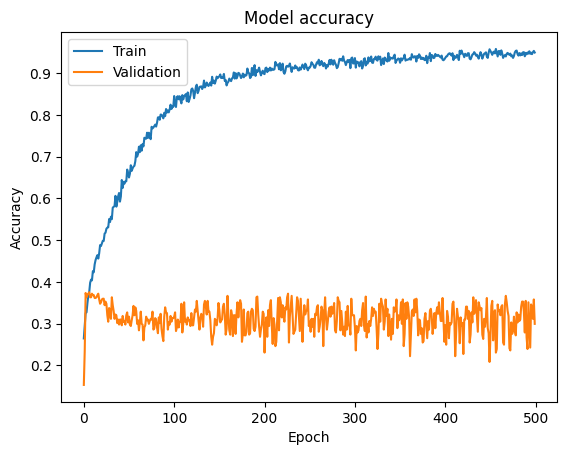

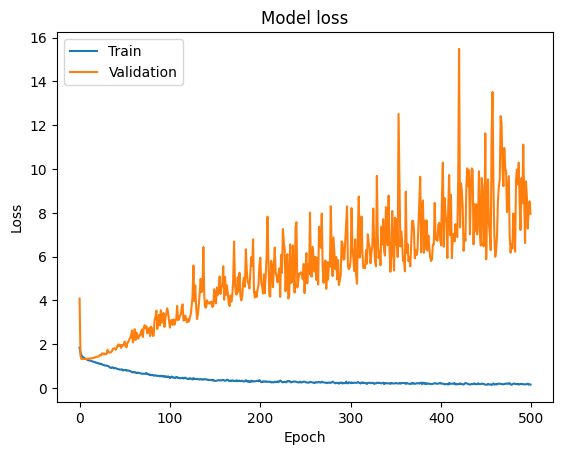

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [ ]:
test_dfs = [pd.read_csv('/content/drive/MyDrive/output_S17(use for test).csv')]

In [ ]:
for test_df in test_dfs:
  test_df.columns = list(range(len(test_df.columns)))

In [ ]:
test_dfs = pd.DataFrame(test_dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
test_data = test_dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
test_data = test_data.rename({5000: 'Label'}, axis=1)

In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0,3.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0,2.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0,1.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0,4.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0,2.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0,2.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0,1.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0,2.0


In [ ]:
test_y = test_data['Label'].copy()
test_X = test_data.drop('Label', axis = 1).copy()

In [ ]:
test_y

0      3.0
1      2.0
2      1.0
3      4.0
4      2.0
      ... 
292    2.0
293    2.0
294    1.0
295    2.0
296    1.0
Name: Label, Length: 297, dtype: float64

In [ ]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31679.0,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,27736.0,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31655.0,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32249.0,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25187.0,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27497.0,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26764.0,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31855.0,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28919.0,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0


In [ ]:
predictions = model.predict(test_X)

# Iterate through each row and print the predictions
for i in range(len(predictions)):
    print(f"Row {i+1} Predictions: {predictions[i]}")

10/10 [==============================] - 0s 5ms/step
Row 1 Predictions: [1. 1. 0. 0.]
Row 2 Predictions: [1. 1. 0. 0.]
Row 3 Predictions: [1. 1. 0. 0.]
Row 4 Predictions: [1. 1. 0. 0.]
Row 5 Predictions: [1. 1. 0. 0.]
Row 6 Predictions: [1. 1. 0. 0.]
Row 7 Predictions: [1. 1. 0. 0.]
Row 8 Predictions: [1. 1. 0. 0.]
Row 9 Predictions: [1. 1. 0. 0.]
Row 10 Predictions: [1. 1. 0. 0.]
Row 11 Predictions: [1. 1. 0. 0.]
Row 12 Predictions: [1. 1. 0. 0.]
Row 13 Predictions: [1. 1. 0. 0.]
Row 14 Predictions: [1. 1. 0. 0.]
Row 15 Predictions: [1. 1. 0. 0.]
Row 16 Predictions: [1. 1. 0. 0.]
Row 17 Predictions: [1. 1. 0. 0.]
Row 18 Predictions: [1. 1. 0. 0.]
Row 19 Predictions: [1. 1. 0. 0.]
Row 20 Predictions: [1. 1. 0. 0.]
Row 21 Predictions: [1. 1. 0. 0.]
Row 22 Predictions: [1. 1. 0. 0.]
Row 23 Predictions: [1. 1. 0. 0.]
Row 24 Predictions: [1. 1. 0. 0.]
Row 25 Predictions: [1. 1. 0. 0.]
Row 26 Predictions: [1. 1. 0. 0.]
Row 27 Predictions: [1. 1. 0. 0.]
Row 28 Predictions: [1. 1. 0. 0.]
Row 

## Resuts

In [ ]:
from tensorflow.keras.utils import to_categorical

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

results = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1]*100))

Test Accuracy: 32.64%


34.89%

## Save model

In [ ]:
model.save('/content/drive/MyDrive/ecg_emotion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model.tflite', 'wb').write(tflite_model)

1842816

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model'

In [ ]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

# 2 Class Classification

In [ ]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output_2class_1000in.csv')]

In [ ]:
dfs

[       data1  data2  data3  data4  data5  data6  data7  data8  data9  data10  \
 0      33444  33503  33489  33463  33431  33431  33481  33414  33339   33372   
 1      29254  29300  29199  29098  29136  29165  29225  29297  29242   29111   
 2      33995  34028  34129  34307  34479  34696  34989  35311  35535   35593   
 3      33837  33919  34007  34167  34337  34407  34414  34357  34265   34283   
 4      35287  35211  35100  34913  34707  34524  34305  34179  34169   34105   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
 19286  29147  29261  29452  29509  29585  29697  29780  29845  29883   30063   
 19287  27719  27717  27703  27762  27834  27919  28095  28219  28375   28497   
 19288  28487  28677  28737  28766  28859  28833  28885  28881  28946   29196   
 19289  29090  28996  28959  28968  28965  28983  29181  29356  29573   29883   
 19290  27059  27149  27346  27557  27520  27468  27743  27940  28124   28279   
 
        ...  data992  data

In [ ]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [ ]:
dfs

[        0      1      2      3      4      5      6      7      8      9     \
 0      33444  33503  33489  33463  33431  33431  33481  33414  33339  33372   
 1      29254  29300  29199  29098  29136  29165  29225  29297  29242  29111   
 2      33995  34028  34129  34307  34479  34696  34989  35311  35535  35593   
 3      33837  33919  34007  34167  34337  34407  34414  34357  34265  34283   
 4      35287  35211  35100  34913  34707  34524  34305  34179  34169  34105   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 19286  29147  29261  29452  29509  29585  29697  29780  29845  29883  30063   
 19287  27719  27717  27703  27762  27834  27919  28095  28219  28375  28497   
 19288  28487  28677  28737  28766  28859  28833  28885  28881  28946  29196   
 19289  29090  28996  28959  28968  28965  28983  29181  29356  29573  29883   
 19290  27059  27149  27346  27557  27520  27468  27743  27940  28124  28279   
 
        ...   991    992    993    994

In [ ]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({1000: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Label
0,32311,32345,32402,32437,32477,32477,32490,32469,32421,32434,...,27377,27347,27374,27341,27317,27350,27312,27239,27216,1
1,31985,31946,31906,31924,31914,31919,31996,32087,32168,32229,...,31525,31537,31614,31733,31828,31827,31733,31655,31823,1
2,33225,33115,33039,32965,32846,32709,32650,32607,32580,32560,...,32007,31953,31955,31989,31967,31844,31726,31709,31723,1
3,30980,30873,30708,30565,30477,30382,30350,30305,30236,30207,...,34343,34351,34359,34399,34415,34479,34483,34475,34475,2
4,31052,31057,30693,30293,30189,30321,30259,30319,30530,30781,...,33497,33462,33489,33457,33369,33336,33291,33263,33258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,33757,33753,33775,33765,33749,33761,33723,33684,33693,33679,...,32348,32275,32188,32059,31919,31763,31589,31463,31375,1
19287,26151,25674,25726,25877,25713,25393,25172,24742,24188,23984,...,30974,30325,29738,29271,29044,28690,28052,27385,26935,1
19288,26527,26627,26700,26725,26779,26848,26913,27027,27185,27297,...,32500,32529,32538,32559,32573,32595,32632,32645,32649,1
19289,31329,31297,31235,31231,31261,31327,31359,31421,31551,31607,...,37125,37065,36947,36782,36579,36365,36149,35929,35718,1


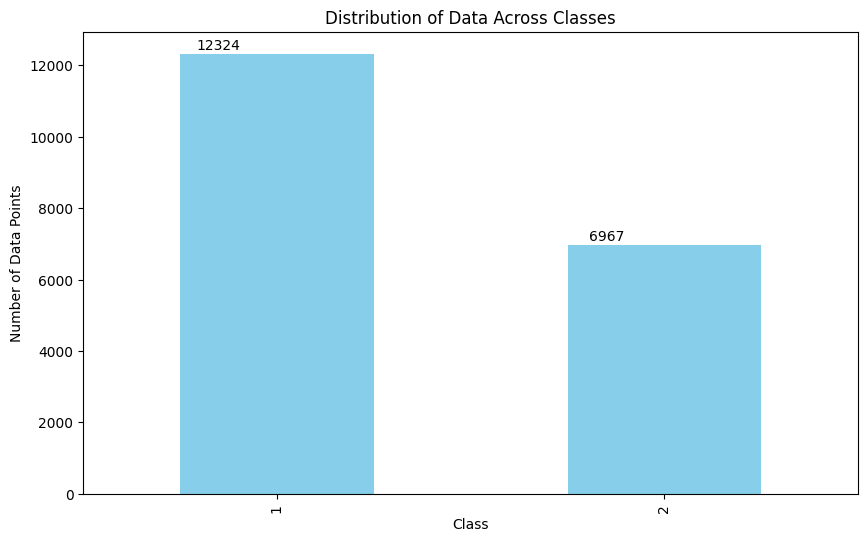

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


In [ ]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

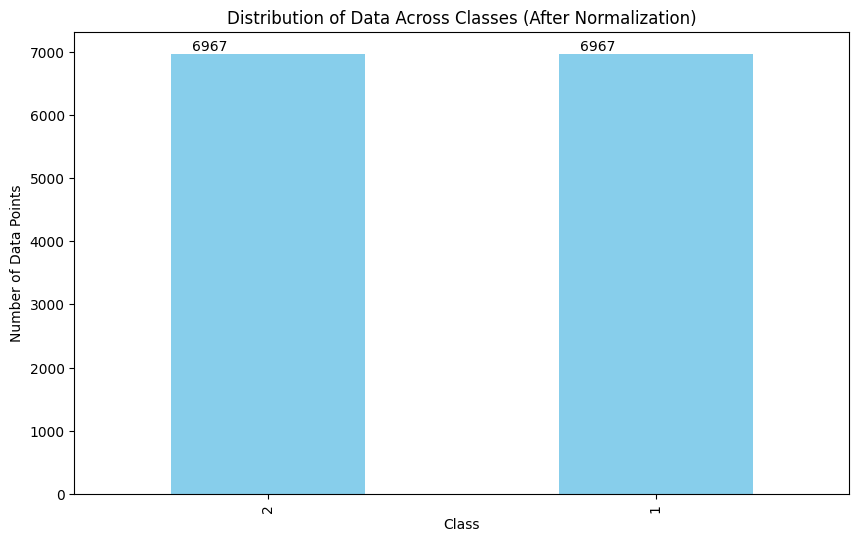

In [ ]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# if want use normalised data for training, use this

y = normalized_data['Label'].copy()
X = normalized_data.drop('Label', axis = 1).copy()

In [ ]:
# label column
y

14273    2
5351     2
18419    2
15452    1
7704     2
        ..
1457     1
8026     2
17694    1
11251    1
16954    2
Name: Label, Length: 13934, dtype: int64

In [ ]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
14273,32639,32646,32708,32648,32675,32768,32756,32655,32612,32641,...,30891,31025,31113,31187,31271,31261,31225,31169,31167,31213
5351,32179,32860,33396,33757,33927,34135,34276,34408,34621,34668,...,39643,40003,40596,40804,40550,40260,39808,39543,39397,39381
18419,31721,31644,31501,31263,31024,30887,30847,30905,30955,30902,...,32535,32290,32356,32727,33054,33092,33133,32977,32965,33077
15452,32092,32095,32066,32069,32107,32151,32145,32128,32143,32073,...,30934,30944,31018,31083,31150,31231,31279,31333,31359,31364
7704,32604,32695,32812,32925,33073,33211,33321,33355,33333,33317,...,33375,33459,33517,33547,33505,33446,33402,33363,33282,33270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,29263,29287,29303,29277,29262,29305,29379,29443,29482,29521,...,29932,29995,30045,30133,30177,30177,30195,30232,30347,30476
8026,34773,34943,35119,35037,34908,34705,34484,34385,34364,34237,...,32327,32348,32439,32421,32330,32225,32221,32225,32334,32425
17694,31796,31757,31751,31734,31720,31732,31702,31735,31796,31855,...,29693,29709,29772,29860,30007,30116,30113,30101,30113,30155
11251,32225,32173,32188,32217,32191,32129,32123,32144,32165,32195,...,28796,28798,28797,28847,28929,28975,29045,29165,29240,29258


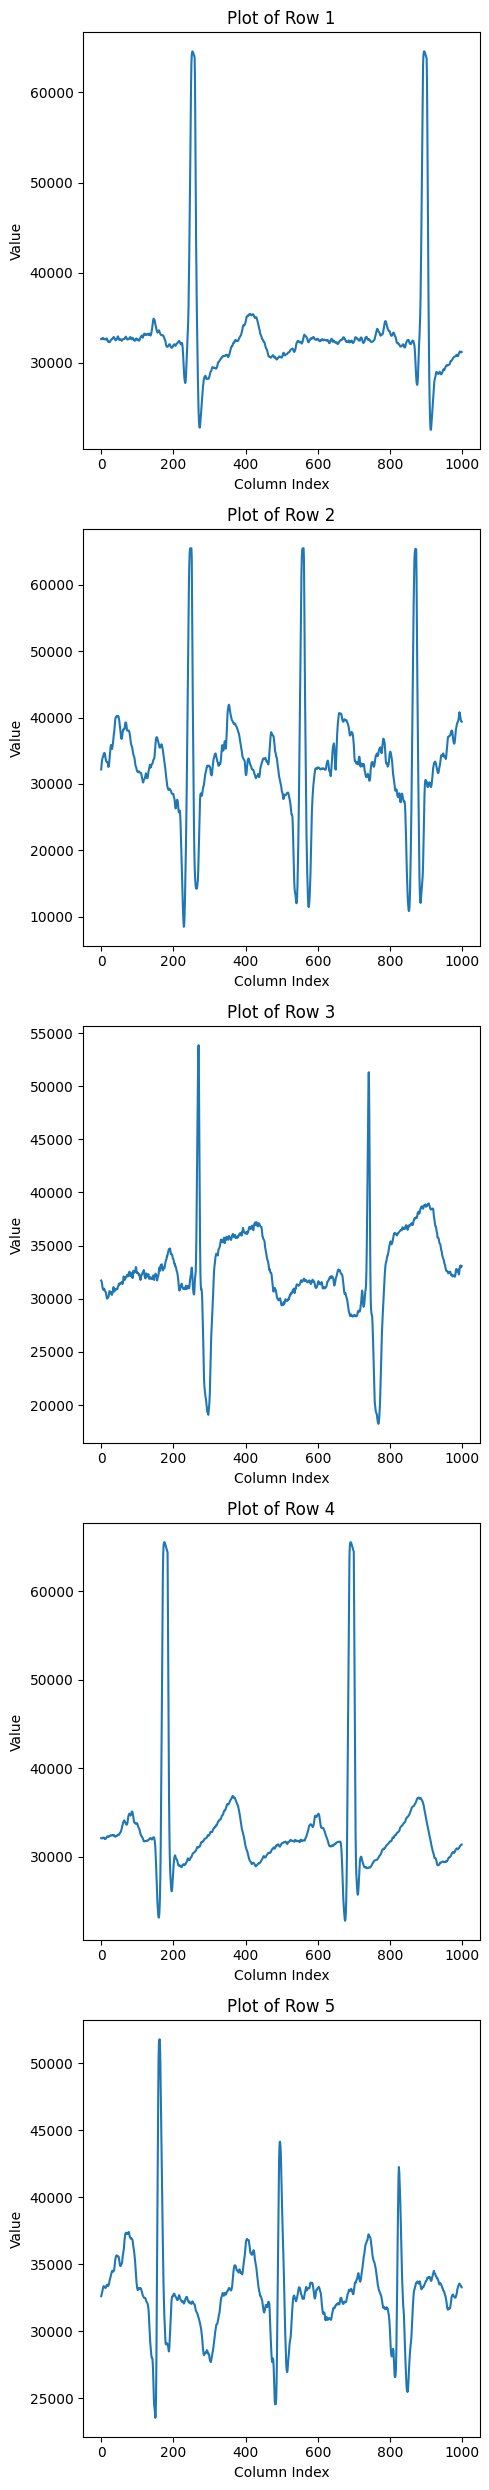

In [ ]:
# Assuming dfs is your DataFrame
# Extracting the first three rows
rows_to_plot = X.iloc[:5, :]

# Get the number of rows and columns
num_rows, num_cols = rows_to_plot.shape

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(5, 5*num_rows))

# Plot each row in a separate subplot
for i in range(num_rows):
    axes[i].plot(rows_to_plot.iloc[i, :])
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Plot of Row {i+1}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1)

In [ ]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
19029,31883,31913,31985,31967,31830,31845,31988,32125,32219,32263,...,32876,32895,32935,32959,32775,32645,32516,32626,32701,32788
17797,35125,32825,31037,29813,29211,28957,28744,28503,28225,28113,...,26284,26445,26481,26575,26656,26855,27023,27119,27145,27259
4023,32621,32732,32807,32933,32965,33013,33089,33170,33247,33335,...,32905,33089,33343,33575,33798,34007,34242,34431,34633,34751
83,22722,23205,23619,24061,24353,24526,24580,24603,24641,24706,...,23471,23853,24104,24291,24410,24451,24378,24281,24347,24388
14051,31529,31566,31564,31583,31612,31711,31753,31813,31847,31769,...,34679,33949,33425,33071,32701,32239,31827,31577,31247,30991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,32812,32872,32911,32963,33047,33153,33253,33313,33342,33381,...,55588,48589,42141,35929,30079,26095,23830,22398,21566,20931
7272,34047,34128,34203,34111,34028,34009,33886,33702,33345,32989,...,33531,33647,33861,34011,34018,33996,34020,34014,34065,34112
10744,32819,32347,31831,31516,31279,31167,31143,31054,30901,30721,...,31996,31888,31807,31787,31767,31740,31680,31650,31653,31623
9406,31313,31152,31110,31003,30951,30991,31021,31035,31135,31300,...,32422,32357,32255,31941,31552,31029,30333,29387,28401,27445


In [ ]:
# 70% of labels
y_train

19029    2
17797    2
4023     1
83       2
14051    2
        ..
9681     1
7272     2
10744    1
9406     1
3898     1
Name: Label, Length: 11843, dtype: int64

## Model Visualizer

In [ ]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-g9pa0kfm
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-g9pa0kfm
  Resolved https://github.com/paulgavrikov/visualkeras to commit ccc27c21c2275973ff94e7bd773c4f11f78916d7
  Preparing metadata (setup.py) ... done


## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.h5', save_weights_only=True, save_best_only=False, verbose=1)

model = Sequential()

# Adjust labels to be 0 or 1
y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=2)

# Input layer
model.add(Dense(32, input_shape=(X_train.shape[1],)))

# FC Layer - 128 nodes
model.add(Dense(16))

# model.add(Dense(16, kernel_regularizer=l2(0.01)))  # Add L2 regularization

# Batch Normalisation - 128 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 128 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 128 nodes
model.add(LeakyReLU(0.2))

# model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(8))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(4))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                16032     
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_10 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                      

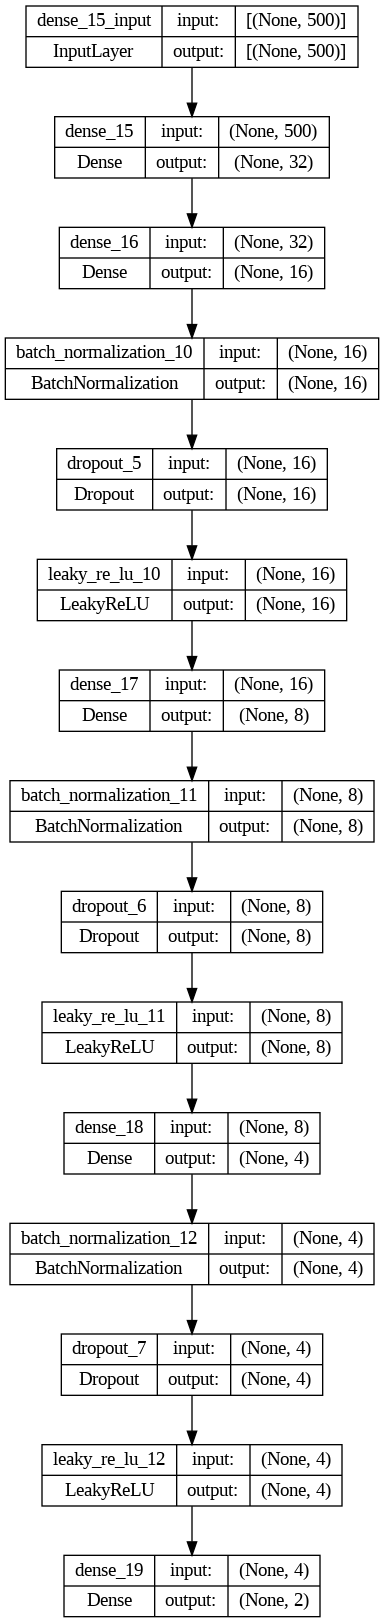

In [ ]:
# from tensorflow.keras.utils import plot_model

# # Save a visualization of the model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

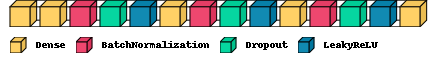

In [ ]:
# import visualkeras
# visualkeras.layered_view(model, legend=True) # without custom font
# from PIL import ImageFont
# visualkeras.layered_view(model, legend=True)

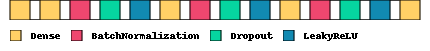

In [ ]:
# visualkeras.layered_view(model, legend=True, draw_volume=False)
# # visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Convert X_train DataFrame to numpy array
X_train_array = X_train.to_numpy()

checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.h5', save_weights_only=True, save_best_only=True, verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model = Sequential()

# Adjust labels to be 0 or 1
y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=2)

# Convolutional layers
model.add(Conv1D(filters=8, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Fully connected layers
# model.add(Dense(32, kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LeakyReLU(0.2))

model.add(Dense(8, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(LeakyReLU(0.2))

model.add(Dense(4, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LeakyReLU(0.2))

# model.add(Dense(4, kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LeakyReLU(0.2))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.000008)  # Adjust the learning rate
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Reshape X_train to include a channel dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 996, 8)            48        
                                                                 
 max_pooling1d (MaxPooling1  (None, 498, 8)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3984)              0         
                                                                 
 dense (Dense)               (None, 8)                 31880     
                                                                 
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8)                 0

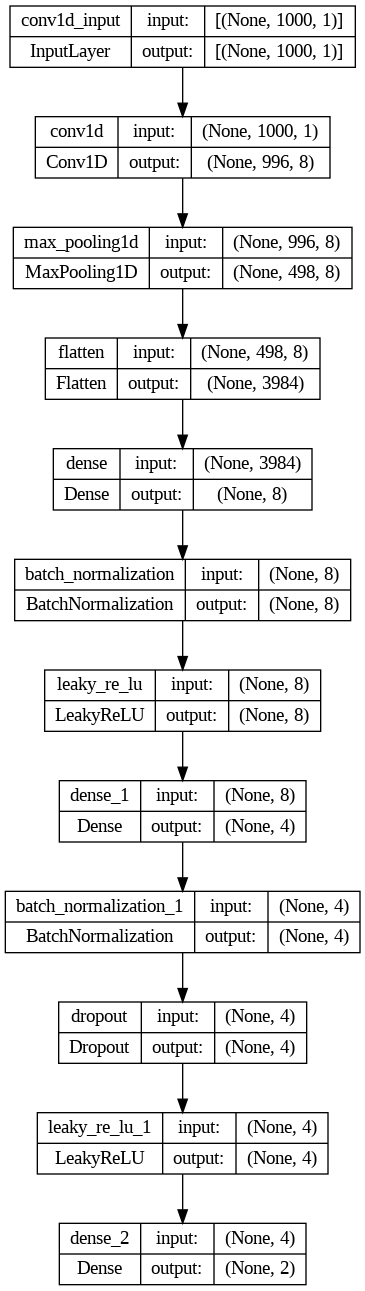

In [ ]:
from tensorflow.keras.utils import plot_model

# Save a visualization of the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Alternatively, display the visualization directly in Jupyter Notebook
# plot_model(model, show_shapes=True, show_layer_names=True)

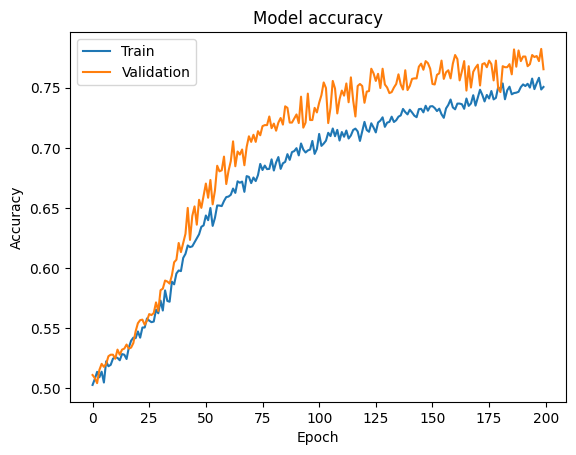

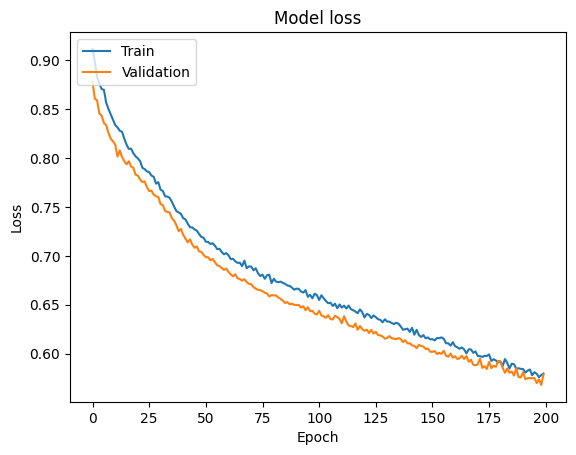

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_accuracy = history.history['val_accuracy'][best_epoch]

print("Best Validation Accuracy:", best_val_accuracy, "at epoch", best_epoch + 1)

# Evaluate the model at the best epoch
best_model = Sequential.from_config(model.get_config())  # Create a new model with the same architecture

# Load the weights of the model at the best epoch
best_model.load_weights(f"model_weights_epoch_{best_epoch + 1}.h5")
# best_model.load_weights(f"model_weights_epoch_{200}.h5")

# Compile the best model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=2)

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Validation Accuracy: 0.7821865677833557 at epoch 199
66/66 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7676
Test Accuracy of the Best Model: 0.7675753235816956


In [ ]:
best_model.save('/content/drive/MyDrive/ecg_emotion_model_2class_1000in_CNN_1p3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model_2class_500in_CNN_1p3.tflite', 'wb').write(tflite_model)

36960

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model_2class_500in_CNN'

In [ ]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))